In [768]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [769]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Carga de data y EDA

In [770]:
carpeta_principal = r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\chest_xray"

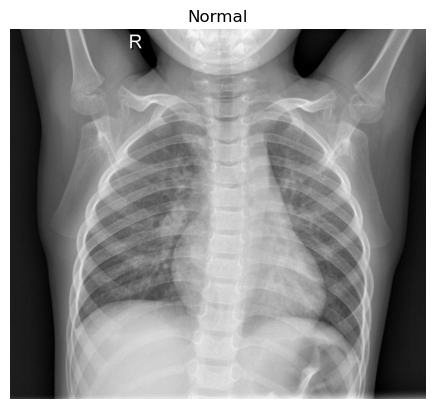

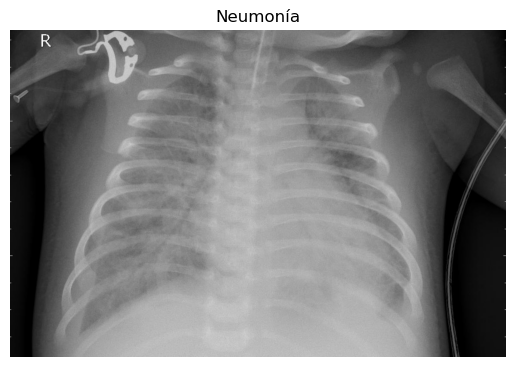

In [771]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Rutas de las carpetas de ejemplo
ejemplo_normal_dir = (r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\chest_xray\chest_xray\train\NORMAL")
ejemplo_pneumonia_dir = (r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\chest_xray\chest_xray\train\PNEUMONIA")

# Función para mostrar una imagen de ejemplo
def mostrar_imagen_ejemplo(carpeta, etiqueta):
    imagen = os.listdir(carpeta)[0]
    imagen_ruta = os.path.join(carpeta, imagen)

    plt.imshow(load_img(imagen_ruta))
    plt.title(etiqueta)
    plt.axis('off')
    plt.show()

mostrar_imagen_ejemplo(ejemplo_normal_dir, etiqueta="Normal")
mostrar_imagen_ejemplo(ejemplo_pneumonia_dir, etiqueta="Neumonía")

In [772]:
import os

# Asignaciòn de carpetas de train, validaciòn y test
train_dir = os.path.join(carpeta_principal, "train")
validation_dir = os.path.join(carpeta_principal, "val")
test_dir = os.path.join(carpeta_principal, "test")

In [773]:
# Conteo de imàgenes
num_normales_train = len(os.listdir(os.path.join(train_dir, "NORMAL")))
num_neumonia_train = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

num_normales_val = len(os.listdir(os.path.join(validation_dir, "NORMAL")))
num_neumonia_val = len(os.listdir(os.path.join(validation_dir, "PNEUMONIA")))

num_normales_test = len(os.listdir(os.path.join(test_dir, "NORMAL")))
num_neumonia_test = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

# Calcular el total de imágenes en cada conjunto
total_train = num_normales_train + num_neumonia_train
total_val = num_normales_val + num_neumonia_val
total_test = num_normales_test + num_neumonia_test

# Imprimir los totales
print("Total de imágenes de entrenamiento - Normales:", num_normales_train)
print("Total de imágenes de entrenamiento - Neumonía:", num_neumonia_train)

print("Total de imágenes de validación - Normales:", num_normales_val)
print("Total de imágenes de validación - Neumonía:", num_neumonia_val)

print("Total de imágenes de prueba - Normales:", num_normales_test)
print("Total de imágenes de prueba - Neumonía:", num_neumonia_test)

# Calcular el total general
total_general = total_train + total_val + total_test

# Imprimir el total general
print("Total de imágenes en todas las carpetas:", total_general)


Total de imágenes de entrenamiento - Normales: 1341
Total de imágenes de entrenamiento - Neumonía: 3875
Total de imágenes de validación - Normales: 8
Total de imágenes de validación - Neumonía: 8
Total de imágenes de prueba - Normales: 234
Total de imágenes de prueba - Neumonía: 390
Total de imágenes en todas las carpetas: 5856


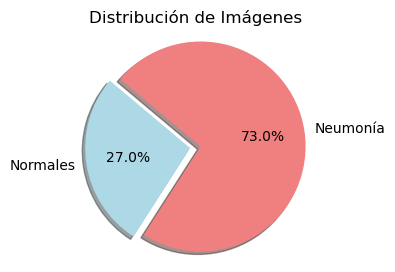

In [774]:
import matplotlib.pyplot as plt

labels = ['Normales', 'Neumonía']
sizes = [total_general - num_neumonia_train - num_neumonia_val - num_neumonia_test, num_neumonia_train + num_neumonia_val + num_neumonia_test]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribución de Imágenes')
plt.axis('equal')

plt.show()

# Preprocesamiento de imágenes

In [775]:
# Parámetros
img_width, img_height = 150, 150
batch_size = 32

# Rutas de las carpetas de entrenamiento, validación y prueba
train_dir = os.path.join(carpeta_principal, "train")
validation_dir = os.path.join(carpeta_principal, "val")  # Carpeta de validación
test_dir = os.path.join(carpeta_principal, "test")


In [776]:
# Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [777]:
# Generadores de entrenamiento y Clases Normal y Neumonía

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Modelo CNN

In [778]:
# Estructura del modelo

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [779]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [780]:
# Evaluar modelo en el conjunto de pruebas (test)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

20/20 [==============================] - 11s 517ms/step - loss: 0.6947 - accuracy: 0.3974
Test accuracy: 0.39743590354919434


In [781]:
# Entrenar con conjunto de validación
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,  # conjunto de validación
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
163/163 [==============================] - 125s 765ms/step - loss: 0.4649 - accuracy: 0.7743
Epoch 2/10
163/163 [==============================] - 126s 771ms/step - loss: 0.3555 - accuracy: 0.8493
Epoch 3/10
163/163 [==============================] - 128s 784ms/step - loss: 0.2967 - accuracy: 0.8742
Epoch 4/10
163/163 [==============================] - 132s 809ms/step - loss: 0.2373 - accuracy: 0.8953
Epoch 5/10
163/163 [==============================] - 125s 764ms/step - loss: 0.2267 - accuracy: 0.9076
Epoch 6/10
163/163 [==============================] - 125s 767ms/step - loss: 0.2129 - accuracy: 0.9114
Epoch 7/10
163/163 [==============================] - 121s 745ms/step - loss: 0.1971 - accuracy: 0.9212
Epoch 8/10
163/163 [==============================] - 122s 748ms/step - loss: 0.1922 - accuracy: 0.9270
Epoch 9/10
163/163 [==============================] - 122s 747ms/step - loss: 0.1955 - accuracy: 0.9208
Epoch 10/10
163/163 [==============================] - 122s 748m

In [782]:
# Guardar el modelo para su uso posterior.
model.save('radiografia_modelo.h5')

In [783]:
#model.summary()

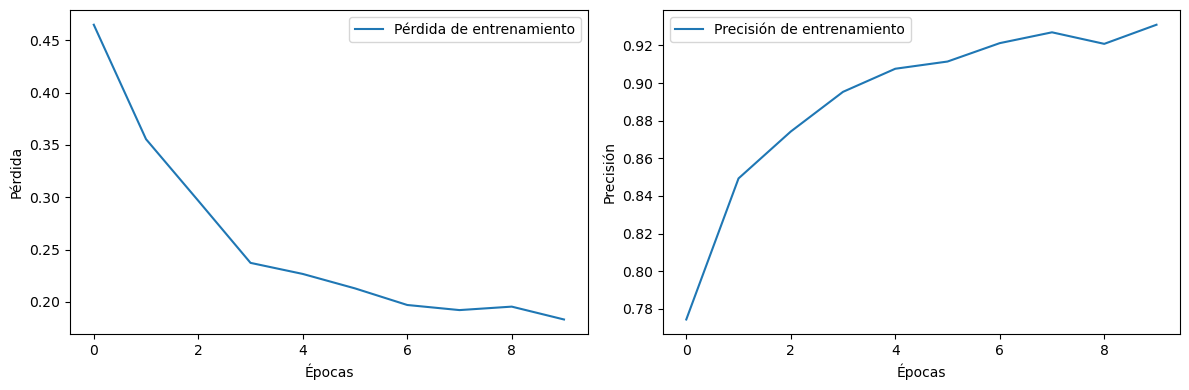

In [784]:
plt.figure(figsize=(12, 4))
# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [785]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [786]:
# Cargar el modelo entrenado
model = load_model(r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\radiografia_modelo.h5")  # Ruta al archivo del modelo

In [788]:
# Carpetas para probar
test_normal_dir = (r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\chest_xray\test\NORMAL")
test_pneumonia_dir = (r"C:\Users\jorge\OneDrive\Escritorio\Documentos de trabajo\Proyectos ciencia de datos\Bootcamp_Ciencia de datos\Proyecto 7\chest_xray\test\PNEUMONIA")


In [789]:
# Cargar una imagen y convertirla en un arreglo
def cargar_procesar(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [790]:
# Clases del modelo (normal y neumonía)
class_names = ['Normal', 'Neumonía']

Probando modelo con imàgenes muestra

In [791]:
# Verificar algunas imágenes clasificadas por el modelo
sample_images = [os.path.join(test_normal_dir, img) for img in os.listdir(test_normal_dir)[:5]] + \
                [os.path.join(test_pneumonia_dir, img) for img in os.listdir(test_pneumonia_dir)[:5]]

1/1 [==============================] - 0s 63ms/step


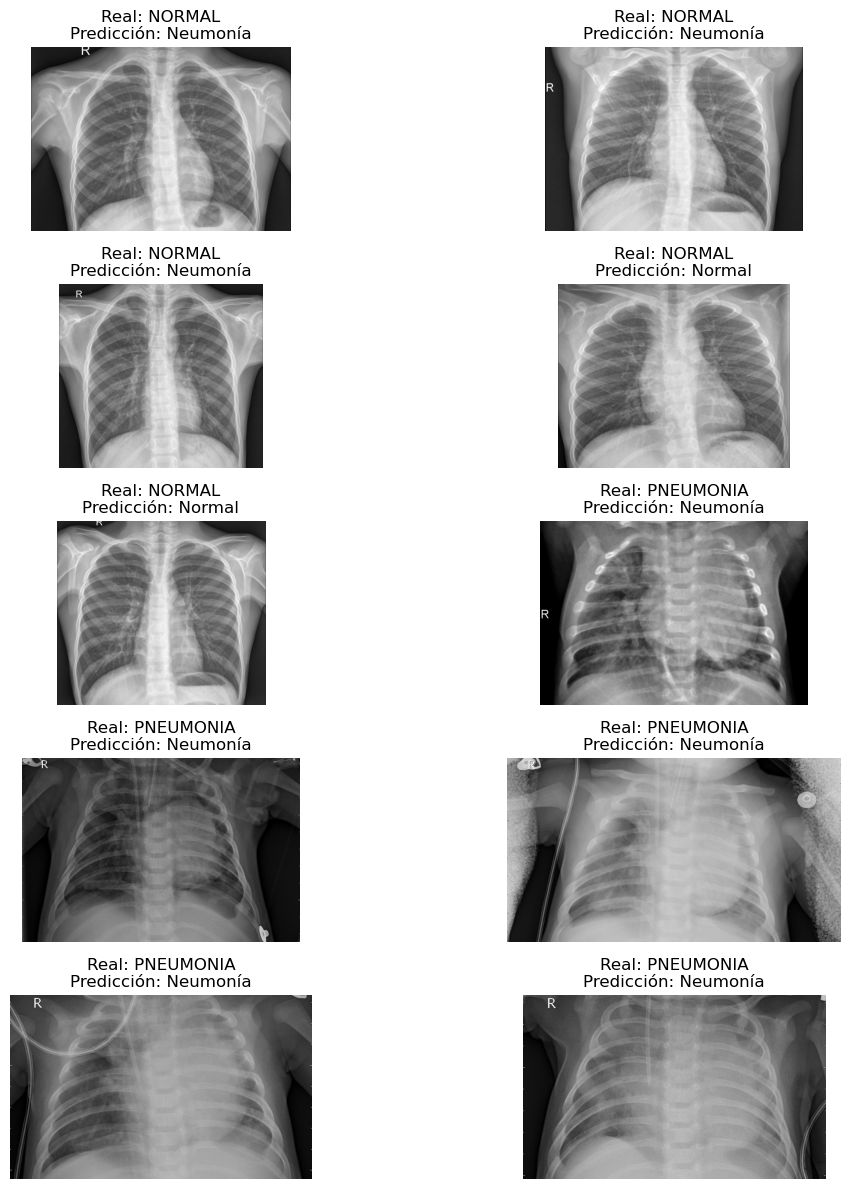

In [792]:
plt.figure(figsize=(12, 12))

for i, image_path in enumerate(sample_images, 1):
    image = cargar_procesar(image_path)
    prediction = model.predict(image)
    predicted_class = class_names[int(prediction[0][0] > 0.5)]  # Umbral de clasificación

    plt.subplot(5, 2, i)
    plt.imshow(load_img(image_path))
    plt.title(f"Real: {os.path.basename(os.path.dirname(image_path))}\nPredicción: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

20/20 [==============================] - 9s 469ms/step


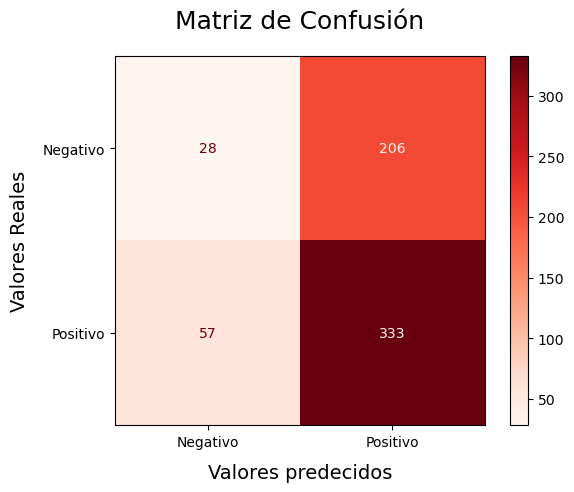

In [793]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# conjunto de prueba para predicciones
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
y_true = test_generator.classes # etiquetas

confusion = confusion_matrix(y_true, y_pred)

# Crear el heatmap de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Reds', values_format='d')

plt.xlabel("Valores predecidos", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Valores Reales", fontdict={'size': 14}, labelpad=10)
plt.title("Matriz de Confusión", fontdict={'size': 18}, pad=20)
plt.show()
